# If you happy and I know it you can enter my House 

You'll see how you can in a couple of hours build a deep learning algorithm.

In [17]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import h5py
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from sklearn.metrics import confusion_matrix

import pydot
from IPython.display import SVG


import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow


In [7]:
def load_dataset(path_to_train, path_to_test):
    train_dataset = h5py.File(path_to_train)
    train_x = np.array(train_dataset['train_set_x'][:])
    train_y = np.array(train_dataset['train_set_y'][:])

    test_dataset = h5py.File(path_to_test)
    test_x = np.array(test_dataset['test_set_x'][:])
    test_y = np.array(test_dataset['test_set_y'][:])

    # y reshaped
    train_y = train_y.reshape((1, train_x.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))

    return train_x, train_y, test_x, test_y

This dataset can be used to solve the Happy House problem.
Where, we allow a person to enter the house only if he/she is smiling!
So, a smile detector!


![Texte alternatif…](https://raw.githubusercontent.com/Kulbear/deep-learning-coursera/master/Convolutional%20Neural%20Networks/images/house-members.png)



Details of the "Happy" dataset:

* Images are of shape (64,64,3)
* Training: 600 pictures
* Test: 150 pictures


# Load Dataset

In [4]:
from google.colab import files
data_to_load = files.upload()

Saving train_happy.h5 to train_happy (1).h5


In [5]:
data_to_load = files.upload()

Saving test_happy.h5 to test_happy.h5


In [8]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_dataset("train_happy (1).h5","test_happy.h5")

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  


Image shape : (64, 64, 3)


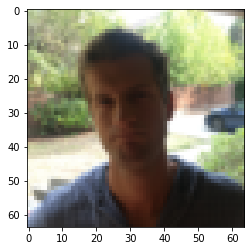

In [9]:
# Sample image from dataset
print("Image shape :",X_train_orig[10].shape)
imshow(X_train_orig[10])

# Building Model

_________________________________________________________________

conv2d_3 (Conv2D)            (None, 64, 64, 32)        4736      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 32769     
_________________________________________________________________



In [12]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same',input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))    
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])

In [14]:
history_model = model.fit(X_train, Y_train, epochs=10, batch_size=64)

Epoch 1/10
10/10 [==============================] - 4s 359ms/step - loss: 0.6861 - accuracy: 0.5133
Epoch 2/10
10/10 [==============================] - 4s 363ms/step - loss: 0.6399 - accuracy: 0.7217
Epoch 3/10
10/10 [==============================] - 4s 361ms/step - loss: 0.5641 - accuracy: 0.7383
Epoch 4/10
10/10 [==============================] - 4s 365ms/step - loss: 0.4758 - accuracy: 0.7833
Epoch 5/10
10/10 [==============================] - 4s 366ms/step - loss: 0.4063 - accuracy: 0.8217
Epoch 6/10
10/10 [==============================] - 4s 364ms/step - loss: 0.3181 - accuracy: 0.8700
Epoch 7/10
10/10 [==============================] - 4s 365ms/step - loss: 0.2817 - accuracy: 0.8817
Epoch 8/10
10/10 [==============================] - 4s 364ms/step - loss: 0.2156 - accuracy: 0.9250
Epoch 9/10
10/10 [==============================] - 4s 364ms/step - loss: 0.1712 - accuracy: 0.9417
Epoch 10/10
10/10 [==============================] - 4s 365ms/step - loss: 0.1369 - accuracy: 0.9550

# Evaluate / Test

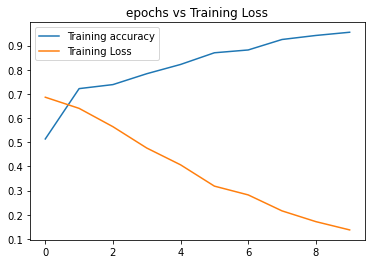

In [15]:
train_accuracy = history_model.history['accuracy']
train_loss = history_model.history['loss']

count = range(len(train_accuracy))
plt.plot(count, train_accuracy, label='Training accuracy')
plt.plot(count, train_loss, label='Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()

Evaluate Test set

In [16]:
# Code Here
test_loss, test_accuracy = model.evaluate(X_test, Y_test, batch_size=64)
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

3/3 [==============================] - 0s 59ms/step - loss: 0.2389 - accuracy: 0.9067
Test loss: 0.2389 accuracy: 0.9067


Confusion Matrix

In [21]:
# Code Here
import pandas as pd
Y_pred=model.predict(X_test)
mat=confusion_matrix(Y_test,Y_pred.round())
print(mat)

[[62  4]
 [10 74]]


# Note

Before you submit your work 

* You should compare different optimizers

---

* Display images with Predicted & expected labels (Happy-sad)


In [22]:
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=["accuracy"])
history_model = model.fit(X_train, Y_train, epochs=10, batch_size=64)

Epoch 1/10
10/10 [==============================] - 4s 362ms/step - loss: 5.1281 - accuracy: 0.7267
Epoch 2/10
10/10 [==============================] - 4s 359ms/step - loss: 0.5230 - accuracy: 0.8233
Epoch 3/10
10/10 [==============================] - 4s 360ms/step - loss: 0.4910 - accuracy: 0.8783
Epoch 4/10
10/10 [==============================] - 4s 358ms/step - loss: 0.4795 - accuracy: 0.8417
Epoch 5/10
10/10 [==============================] - 4s 359ms/step - loss: 0.4274 - accuracy: 0.8933
Epoch 6/10
10/10 [==============================] - 4s 361ms/step - loss: 0.4426 - accuracy: 0.8067
Epoch 7/10
10/10 [==============================] - 4s 360ms/step - loss: 0.3615 - accuracy: 0.9150
Epoch 8/10
10/10 [==============================] - 4s 361ms/step - loss: 0.3394 - accuracy: 0.9133
Epoch 9/10
10/10 [==============================] - 4s 358ms/step - loss: 0.3682 - accuracy: 0.8583
Epoch 10/10
10/10 [==============================] - 4s 358ms/step - loss: 0.2990 - accuracy: 0.9217

In [23]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test, batch_size=64)
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

3/3 [==============================] - 0s 60ms/step - loss: 0.5717 - accuracy: 0.6133
Test loss: 0.5717 accuracy: 0.6133


It seems that the ADAM optimizer works way better than SGD. There is a huge accuracy and loss difference.

In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])
history_model = model.fit(X_train, Y_train, epochs=10, batch_size=64)
test_loss, test_accuracy = model.evaluate(X_test, Y_test, batch_size=64)
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

Epoch 1/10
10/10 [==============================] - 4s 365ms/step - loss: 0.1233 - accuracy: 0.9483
Epoch 2/10
10/10 [==============================] - 4s 361ms/step - loss: 0.0932 - accuracy: 0.9733
Epoch 3/10
10/10 [==============================] - 4s 362ms/step - loss: 0.0976 - accuracy: 0.9600
Epoch 4/10
10/10 [==============================] - 4s 361ms/step - loss: 0.0721 - accuracy: 0.9800
Epoch 5/10
10/10 [==============================] - 4s 361ms/step - loss: 0.0602 - accuracy: 0.9817
Epoch 6/10
10/10 [==============================] - 4s 358ms/step - loss: 0.0722 - accuracy: 0.9767
Epoch 7/10
10/10 [==============================] - 4s 360ms/step - loss: 0.0555 - accuracy: 0.9817
Epoch 8/10
10/10 [==============================] - 4s 362ms/step - loss: 0.0535 - accuracy: 0.9817
Epoch 9/10
10/10 [==============================] - 4s 360ms/step - loss: 0.0484 - accuracy: 0.9867
Epoch 10/10
3/3 [==============================] - 0s 59ms/step - loss: 0.1189 - accuracy: 0.9600
Te

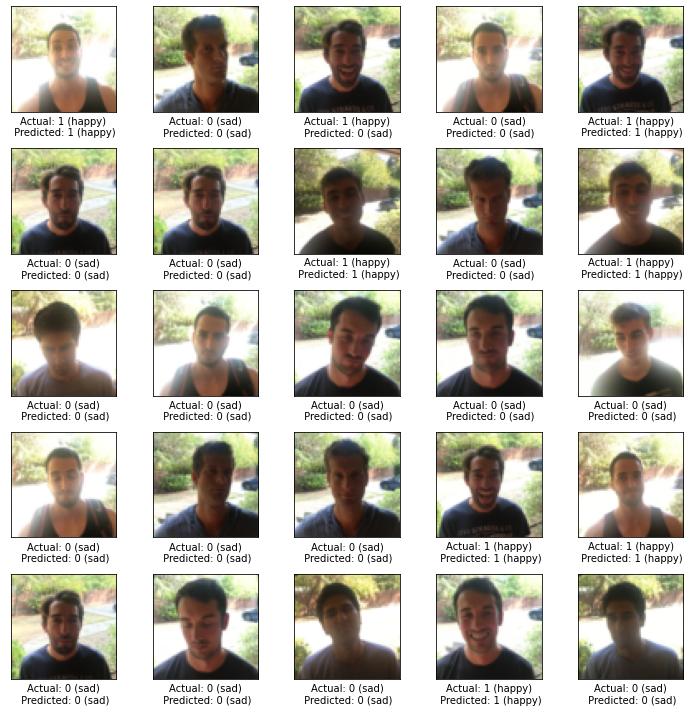

In [34]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    
    img_index = np.random.randint(0, 100)
    plt.imshow(X_test_orig[img_index], cmap=plt.cm.gray)
    
    actual_label = int(Y_test[img_index])
    if (actual_label==0):
      act="sad"
    else:
      act="happy"  
    predicted_label = int(Y_pred[img_index].round())
    if (predicted_label==0):
      prec="sad"
    else:
      prec="happy"  
    
    plt.xlabel("Actual: {} ({})\n Predicted: {} ({})".format(
        actual_label, act, predicted_label, prec
    ))
    
plt.tight_layout()
plt.show()